In [1]:
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.io.arff import loadarff

from sklearn.neighbors import NearestNeighbors
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

In [2]:
df = pd.DataFrame()

In [3]:
for filename in os.listdir('/Users/yihang/jupyter_dir/Machine_Learning_and_Pattern_Classification/data_processed'):
    filename = './data_processed/' + filename
    print(filename)
    temp = np.load(filename)
    df_temp = pd.DataFrame(temp)
    df_temp['class'] = df_temp['class'].str.decode("utf-8")
    # select one class
    df_selected = df_temp[df_temp['class'].isin(['park'])]
    df = df.append(df_selected)

./data_processed/chunk8.npy
./data_processed/chunk9.npy
./data_processed/chunk14.npy
./data_processed/chunk15.npy
./data_processed/chunk17.npy
./data_processed/chunk16.npy
./data_processed/chunk12.npy
./data_processed/chunk13.npy
./data_processed/chunk11.npy
./data_processed/chunk10.npy
./data_processed/chunk21.npy
./data_processed/chunk20.npy
./data_processed/chunk22.npy
./data_processed/chunk23.npy
./data_processed/chunk18.npy
./data_processed/chunk24.npy
./data_processed/chunk19.npy
./data_processed/chunk1.npy
./data_processed/chunk2.npy
./data_processed/chunk3.npy
./data_processed/chunk7.npy
./data_processed/chunk6.npy
./data_processed/chunk4.npy
./data_processed/chunk5.npy


In [4]:
df.describe()

,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,...,mfcc_50,mfcc_51,mfcc_52,mfcc_53,mfcc_54,mfcc_55,mfcc_56,mfcc_57,mfcc_58,mfcc_59
count,156312.000000,156312.000000,156312.000000,156312.000000,156312.000000,156312.000000,156312.000000,156312.000000,156312.000000,156312.000000,...,156312.000000,156312.000000,156312.000000,156312.000000,156312.000000,156312.000000,156312.000000,156312.000000,156312.000000,156312.000000
mean,-607.385701,127.357059,-12.473154,42.673531,2.907574,35.645611,7.788671,15.236761,11.764980,4.995902,...,0.001917,-0.001529,0.002391,-0.002272,0.000544,-0.003673,0.002251,-0.002557,0.002780,-0.002839
std,76.032817,19.599270,15.745564,13.983549,10.220231,8.749035,9.289465,7.642565,6.469113,7.035649,...,0.606742,0.595909,0.588303,0.583161,0.576813,0.571325,0.565993,0.566595,0.567413,0.565685
min,-766.249741,-42.941294,-103.913487,-18.129078,-58.434407,-10.244810,-50.569602,-21.334502,-20.909901,-30.294946,...,-3.254825,-3.578549,-4.160064,-2.881573,-3.225897,-2.867501,-2.496561,-2.876934,-4.974984,-3.475745
25%,-681.007510,117.059583,-21.721406,33.258665,-3.435871,29.661036,1.813016,10.028785,7.576436,0.306461,...,-0.399460,-0.397068,-0.389164,-0.391260,-0.384523,-0.383854,-0.377104,-0.379418,-0.374477,-0.376918
50%,-589.879337,129.796436,-12.015748,43.330877,3.348773,35.510128,8.536064,15.323500,11.797881,4.909503,...,-0.000316,-0.000655,0.002840,-0.002481,-0.000779,-0.004628,0.001992,-0.002422,0.002707,-0.002661
75%,-549.916113,140.732555,-1.447898,52.482166,9.768768,41.487700,14.224711,20.537911,15.999960,9.530397,...,0.399688,0.393762,0.392617,0.389020,0.383991,0.378707,0.381347,0.376787,0.380814,0.373460
max,-278.649372,201.548204,56.153490,108.120239,48.826584,82.063256,49.188130,58.742362,50.928908,50.762079,...,3.707551,3.546914,3.212932,3.593562,3.032002,3.056805,2.768197,2.929295,3.415006,3.239653


## Data Visualization

### Histogram

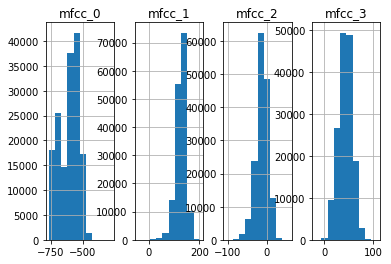

In [5]:
plt.figure()
df.loc[:,'mfcc_0':'mfcc_3'].hist(layout=(1,4))
plt.show()

plt.figure(figsize=(5,5))
plt.hist(df.loc[:,'mfcc_0':'mfcc_3'])
plt.show()

### Density plots 

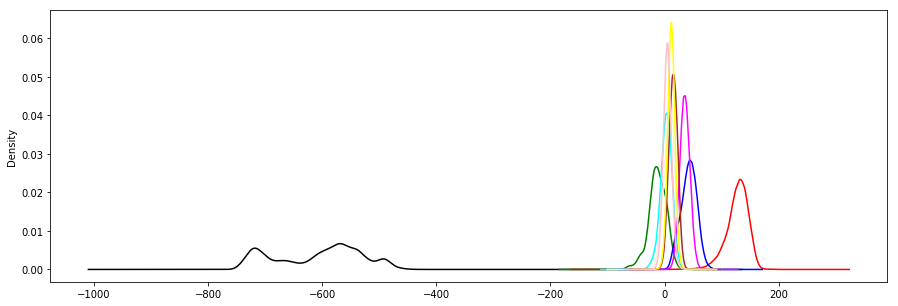

In [16]:
plt.figure(figsize=(15,5))
df['mfcc_0'].plot(kind='density',color='black', subplots=True, sharex=False)
df['mfcc_1'].plot(kind='density',color='red', subplots=True, sharex=False)
df['mfcc_2'].plot(kind='density',color='green', subplots=True, sharex=False)
df['mfcc_3'].plot(kind='density',color='blue', subplots=True, sharex=False)
df['mfcc_4'].plot(kind='density',color='cyan', subplots=True, sharex=False)
df['mfcc_5'].plot(kind='density',color='magenta', subplots=True, sharex=False)
df['mfcc_6'].plot(kind='density',color='beige', subplots=True, sharex=False)
df['mfcc_7'].plot(kind='density',color='brown', subplots=True, sharex=False)
df['mfcc_8'].plot(kind='density',color='yellow', subplots=True, sharex=False)
df['mfcc_9'].plot(kind='density',color='pink', subplots=True, sharex=False)
plt.show()

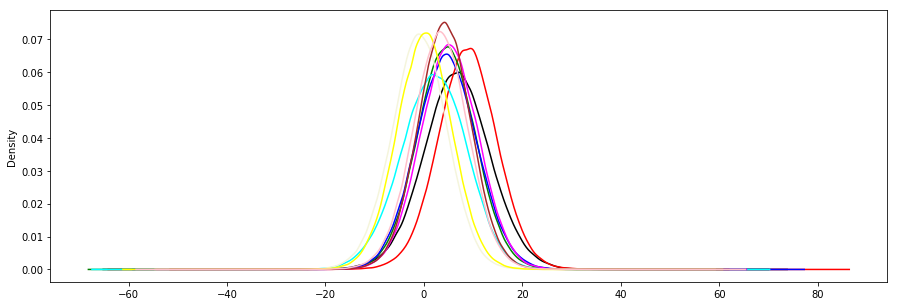

In [17]:
plt.figure(figsize=(15,5))
df['mfcc_10'].plot(kind='density',color='black', subplots=True, sharex=False)
df['mfcc_11'].plot(kind='density',color='red', subplots=True, sharex=False)
df['mfcc_12'].plot(kind='density',color='green', subplots=True, sharex=False)
df['mfcc_13'].plot(kind='density',color='blue', subplots=True, sharex=False)
df['mfcc_14'].plot(kind='density',color='cyan', subplots=True, sharex=False)
df['mfcc_15'].plot(kind='density',color='magenta', subplots=True, sharex=False)
df['mfcc_16'].plot(kind='density',color='beige', subplots=True, sharex=False)
df['mfcc_17'].plot(kind='density',color='brown', subplots=True, sharex=False)
df['mfcc_18'].plot(kind='density',color='yellow', subplots=True, sharex=False)
df['mfcc_19'].plot(kind='density',color='pink', subplots=True, sharex=False)
plt.show()

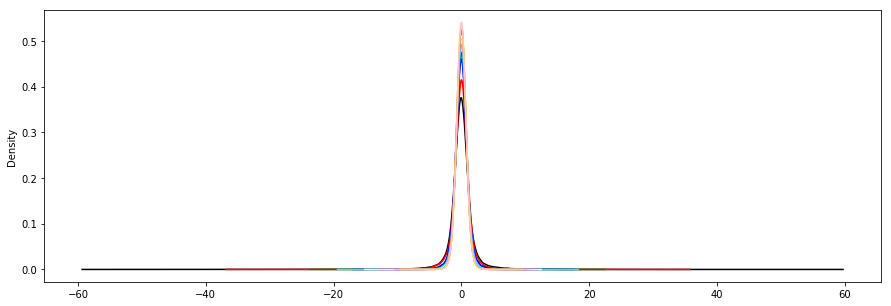

In [18]:
plt.figure(figsize=(15,5))
df['mfcc_20'].plot(kind='density',color='black', subplots=True, sharex=False)
df['mfcc_21'].plot(kind='density',color='red', subplots=True, sharex=False)
df['mfcc_22'].plot(kind='density',color='green', subplots=True, sharex=False)
df['mfcc_23'].plot(kind='density',color='blue', subplots=True, sharex=False)
df['mfcc_24'].plot(kind='density',color='cyan', subplots=True, sharex=False)
df['mfcc_25'].plot(kind='density',color='magenta', subplots=True, sharex=False)
df['mfcc_26'].plot(kind='density',color='beige', subplots=True, sharex=False)
df['mfcc_27'].plot(kind='density',color='brown', subplots=True, sharex=False)
df['mfcc_28'].plot(kind='density',color='yellow', subplots=True, sharex=False)
df['mfcc_29'].plot(kind='density',color='pink', subplots=True, sharex=False)
plt.show()

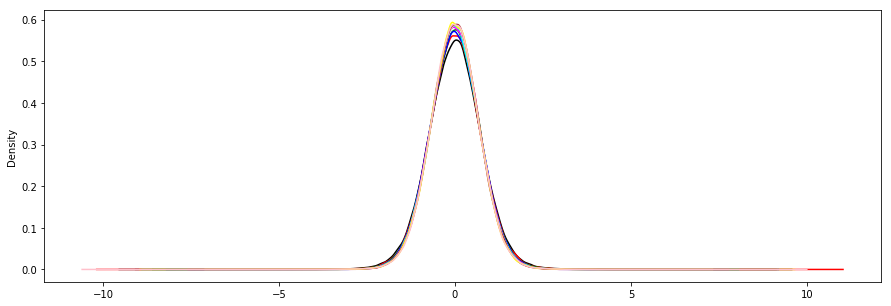

In [19]:
plt.figure(figsize=(15,5))
df['mfcc_30'].plot(kind='density',color='black', subplots=True, sharex=False)
df['mfcc_31'].plot(kind='density',color='red', subplots=True, sharex=False)
df['mfcc_32'].plot(kind='density',color='green', subplots=True, sharex=False)
df['mfcc_33'].plot(kind='density',color='blue', subplots=True, sharex=False)
df['mfcc_34'].plot(kind='density',color='cyan', subplots=True, sharex=False)
df['mfcc_35'].plot(kind='density',color='magenta', subplots=True, sharex=False)
df['mfcc_36'].plot(kind='density',color='beige', subplots=True, sharex=False)
df['mfcc_37'].plot(kind='density',color='brown', subplots=True, sharex=False)
df['mfcc_38'].plot(kind='density',color='yellow', subplots=True, sharex=False)
df['mfcc_39'].plot(kind='density',color='pink', subplots=True, sharex=False)
plt.show()

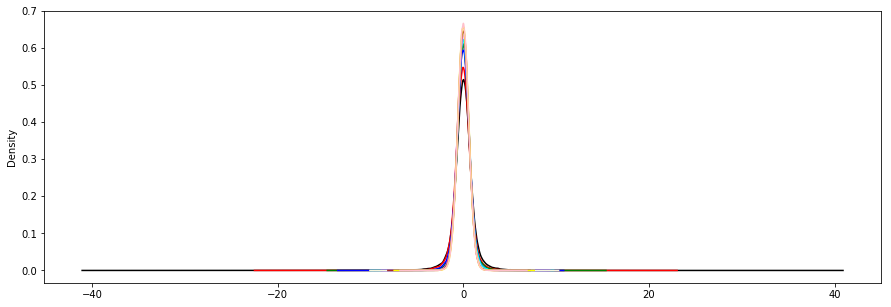

In [20]:
plt.figure(figsize=(15,5))
df['mfcc_40'].plot(kind='density',color='black', subplots=True, sharex=False)
df['mfcc_41'].plot(kind='density',color='red', subplots=True, sharex=False)
df['mfcc_42'].plot(kind='density',color='green', subplots=True, sharex=False)
df['mfcc_43'].plot(kind='density',color='blue', subplots=True, sharex=False)
df['mfcc_44'].plot(kind='density',color='cyan', subplots=True, sharex=False)
df['mfcc_45'].plot(kind='density',color='magenta', subplots=True, sharex=False)
df['mfcc_46'].plot(kind='density',color='beige', subplots=True, sharex=False)
df['mfcc_47'].plot(kind='density',color='brown', subplots=True, sharex=False)
df['mfcc_48'].plot(kind='density',color='yellow', subplots=True, sharex=False)
df['mfcc_49'].plot(kind='density',color='pink', subplots=True, sharex=False)
plt.show()

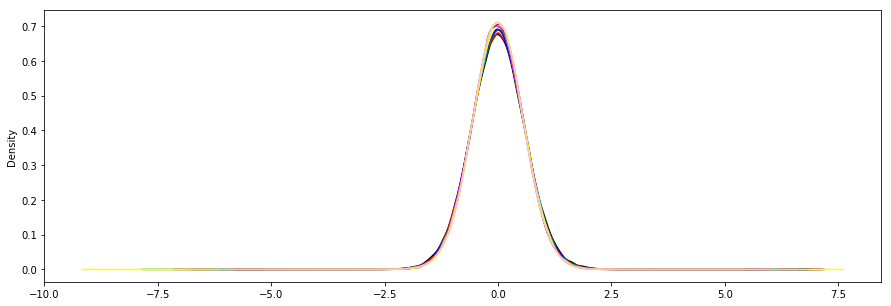

In [21]:
plt.figure(figsize=(15,5))
df['mfcc_50'].plot(kind='density',color='black', subplots=True, sharex=False)
df['mfcc_51'].plot(kind='density',color='red', subplots=True, sharex=False)
df['mfcc_52'].plot(kind='density',color='green', subplots=True, sharex=False)
df['mfcc_53'].plot(kind='density',color='blue', subplots=True, sharex=False)
df['mfcc_54'].plot(kind='density',color='cyan', subplots=True, sharex=False)
df['mfcc_55'].plot(kind='density',color='magenta', subplots=True, sharex=False)
df['mfcc_56'].plot(kind='density',color='beige', subplots=True, sharex=False)
df['mfcc_57'].plot(kind='density',color='brown', subplots=True, sharex=False)
df['mfcc_58'].plot(kind='density',color='yellow', subplots=True, sharex=False)
df['mfcc_59'].plot(kind='density',color='pink', subplots=True, sharex=False)
plt.show()

### Box and wisker plots

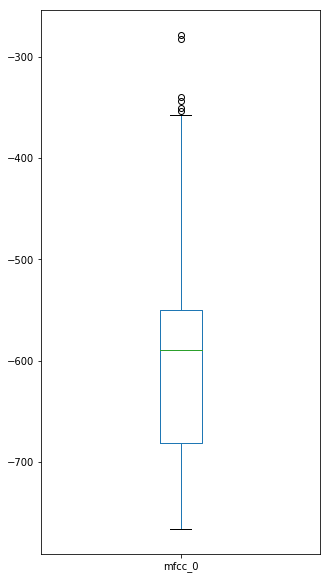

In [9]:
plt.figure(figsize=(5,10))
df['mfcc_0'].plot(kind='box', subplots=True, sharex=True, sharey=False)
plt.show()

### Feature correlation

In [10]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than the threshold
to_drop = [column for column in upper.columns if any(upper[column] > 0.5)]

In [11]:
corr_matrix

,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,...,mfcc_50,mfcc_51,mfcc_52,mfcc_53,mfcc_54,mfcc_55,mfcc_56,mfcc_57,mfcc_58,mfcc_59
mfcc_0,1.000000,0.081777,0.523218,0.463752,0.172614,0.228903,0.338551,0.062453,0.070956,0.016928,...,0.002032,0.000792,0.003160,0.000488,0.000522,0.000231,0.001862,0.000833,0.001303,0.000223
mfcc_1,0.081777,1.000000,0.014210,0.370653,0.171390,0.025770,0.027288,0.015477,0.020221,0.096285,...,0.012943,0.004499,0.002098,0.006591,0.005230,0.004259,0.007707,0.002004,0.002477,0.001288
mfcc_2,0.523218,0.014210,1.000000,0.329343,0.178790,0.134308,0.290459,0.017820,0.000325,0.041570,...,0.002440,0.012558,0.006876,0.005653,0.002054,0.001724,0.000502,0.001170,0.000649,0.002770
mfcc_3,0.463752,0.370653,0.329343,1.000000,0.027208,0.275413,0.257184,0.129970,0.000706,0.126715,...,0.003294,0.004975,0.015548,0.009216,0.004493,0.006107,0.002468,0.004774,0.005678,0.000364
mfcc_4,0.172614,0.171390,0.178790,0.027208,1.000000,0.089778,0.164655,0.077355,0.010806,0.037327,...,0.004867,0.002218,0.003150,0.016676,0.005550,0.002341,0.005901,0.000408,0.001891,0.002589
mfcc_5,0.228903,0.025770,0.134308,0.275413,0.089778,1.000000,0.147660,0.310599,0.063241,0.263381,...,0.008530,0.010090,0.007242,0.002356,0.012599,0.007208,0.005295,0.005706,0.006807,0.001980
mfcc_6,0.338551,0.027288,0.290459,0.257184,0.164655,0.147660,1.000000,0.070109,0.173085,0.137037,...,0.017259,0.004182,0.004067,0.005527,0.000151,0.013290,0.005704,0.007982,0.002421,0.010590
mfcc_7,0.062453,0.015477,0.017820,0.129970,0.077355,0.310599,0.070109,1.000000,0.072035,0.211176,...,0.004361,0.016056,0.009216,0.006209,0.010159,0.002952,0.017721,0.008288,0.013006,0.001723
mfcc_8,0.070956,0.020221,0.000325,0.000706,0.010806,0.063241,0.173085,0.072035,1.000000,0.214574,...,0.009931,0.001564,0.018263,0.010324,0.013117,0.019751,0.006051,0.022420,0.003211,0.010797
mfcc_9,0.016928,0.096285,0.041570,0.126715,0.037327,0.263381,0.137037,0.211176,0.214574,1.000000,...,0.072293,0.009832,0.001824,0.014730,0.010330,0.001207,0.012231,0.004650,0.016872,0.002835


### Plotting heatmap

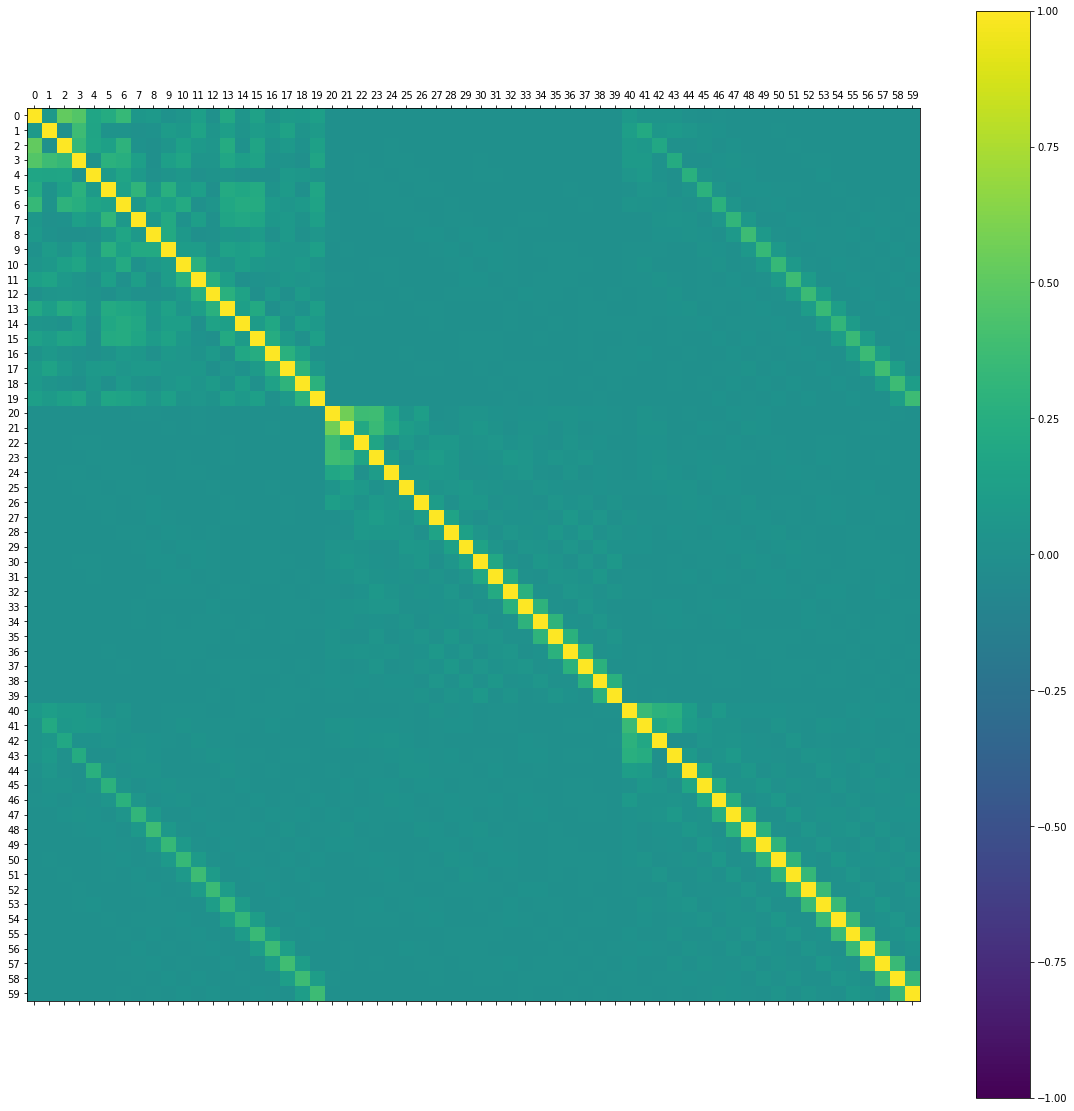

In [12]:
# plot correlation matrix
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
cax = ax.matshow(corr_matrix, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,60,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
#ax.set_xticklabels(names)
#ax.set_yticklabels(names)
plt.show()

In [13]:
len(df.loc[df['class'].isin(['forest_path'])])

0

In [14]:
from sklearn.manifold import TSNE
X = df.drop(['class'], axis=1).values
X_embedded = TSNE(n_components=2).fit_transform(X[0:1000,:])

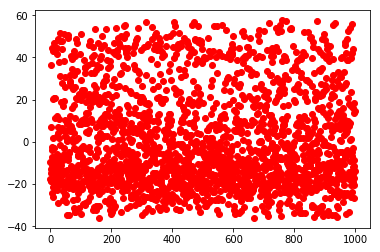

In [15]:
plt.plot(X_embedded, 'ro')
plt.show()